###**Experiment - 5**
###**Aim:** To analyse and learn about pulse code modulation (PCM).

####**Theory:**
**Pulse code modulation(PCM)** was invented by Alec Reeves in 1937 to obtain a digital representation of analog message signals m(t).
   In essence, m(t) is sampled at rate Fs samples per second and then each sample is quantized to b bits which are in turn transmitted serially, e.g., using flat-top PAM. 
   In telephony Fs = 8000 samples per second and b = 8 are the most commonly used parameters for individual subscriber lines, resulting in a binary signal with bit rate Fb = 64 kbit/sec. 
   One advantage of using PCM is that several signals can easily be multiplexed in time so that they can share a single communication channel. A T1 carrier,
for example, is used in telephony to transmit 24 multiplexed PCM signals with a total rate of 1.544 Mbit/sec (this includes some overhead for synchronization). A second advantage is that repeaters that need to be used to compensate for losses over large distances can (within some limits) restore the signal perfectly because only two signal levels need to be distinguished.

* The most common technique to change an analog signal to digital data is called pulse code modulation (PCM). A PCM encoder has the following three processes:
####* Sampling, Quantization and Coding






#### Example: 3-Bit PCM for a Sinewave. 
 The figure below shows a normalized sinewave (blue line) and its sampled and quantized version (red stem plot). A 3-bit quantizer with sign-magnitude output was used. The sign-magnitude format (rather than 2’s complement) reduces the sensitivity for small amplitude values to sign errors that may occur during
transmission.
# 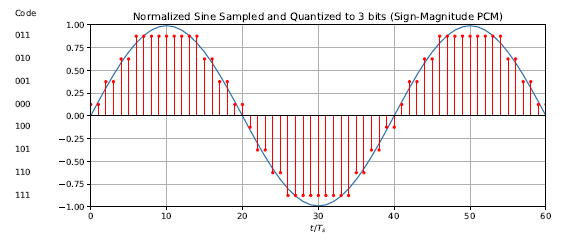

####Python Implementation

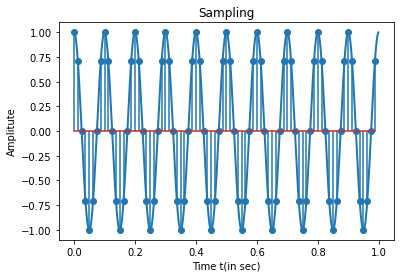

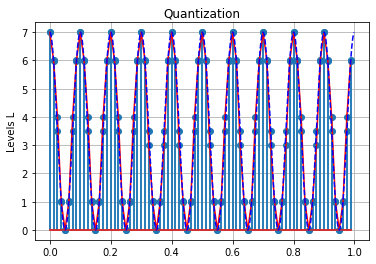

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

A = 1
fm = 10
fs = 80
n = 3
t = np.arange(0, 1, (1 / (100 * fm)))
x = A * np.cos(2 * np.pi * fm * t)
#---Sampling-----
ts = np.arange(0, 1, (1 / (fs)))
xs = A * np.cos(2 * np.pi * fm * ts)
#xs Sampled signal

#--Quantization---
x1 = xs + A
x1 = x1 / (2 * A)
L = (-1 + 2 ** n)# Levels
x1 = L * x1
xq = np.round(x1)
r = xq / L
r = 2 * A * r
r = r - A
#r quantized signal


#Calculations
MSE = np.sum((xs - r)** 2) / len(x)
Bitrate = n * fs
Stepsize = 2 * A / L
QNoise = ((Stepsize) ** 2) / 12

plt.figure(1)
plt.plot(t, x, label= 'Original Signal',linewidth = 2)
plt.title('Sampling')
plt.ylabel('Amplitute')
plt.xlabel('Time t(in sec)')

plt.stem(ts, xs, label='Sampled Signal', use_line_collection = True)
plt.show

plt.figure(2)
plt.stem(ts, x1,use_line_collection = True)
plt.title('Quantization')
plt.ylabel('Levels L')

plt.stem(ts, xq,label= 'Original Signal',use_line_collection = True)
plt.plot(ts, xq, color='r',linestyle ='-',label = 'Quantized Signal')
plt.plot(t, (x + A) * L / (2 * A), 'b--')
plt.grid()
plt.show()


In [ ]:
#----Encoding---
for i in range(0,len(xq)):
    d = np.binary_repr(int(xq[i]),width = 3)
    print('Binary Code',i, d)



Binary Code 0 111
Binary Code 1 110
Binary Code 2 100
Binary Code 3 001
Binary Code 4 000
Binary Code 5 001
Binary Code 6 100
Binary Code 7 110
Binary Code 8 111
Binary Code 9 110
Binary Code 10 100
Binary Code 11 001
Binary Code 12 000
Binary Code 13 001
Binary Code 14 100
Binary Code 15 110
Binary Code 16 111
Binary Code 17 110
Binary Code 18 100
Binary Code 19 001
Binary Code 20 000
Binary Code 21 001
Binary Code 22 100
Binary Code 23 110
Binary Code 24 111
Binary Code 25 110
Binary Code 26 011
Binary Code 27 001
Binary Code 28 000
Binary Code 29 001
Binary Code 30 011
Binary Code 31 110
Binary Code 32 111
Binary Code 33 110
Binary Code 34 011
Binary Code 35 001
Binary Code 36 000
Binary Code 37 001
Binary Code 38 100
Binary Code 39 110
Binary Code 40 111
Binary Code 41 110
Binary Code 42 011
Binary Code 43 001
Binary Code 44 000
Binary Code 45 001
Binary Code 46 100
Binary Code 47 110
Binary Code 48 111
Binary Code 49 110
Binary Code 50 011
Binary Code 51 001
Binary Code 52 000
Bin

####Problem 1 
A signal m(t) band-limited to 3 k.Hz is sampled at a rate 33½ % higher than the Nyquist rate. The maximum acceptable error in the sample amplitude (the maximum quantization error) is 0.5% of the peak amplitude mp. The quantized samples are binary coded. Find the minimum
bandwidth of a channel required to transmit the encoded binary signal. If 24 such signals are time-division-multiplexed, determine the minimum transmission bandwidth required to transmit the multiplexed signal.

####Solution:
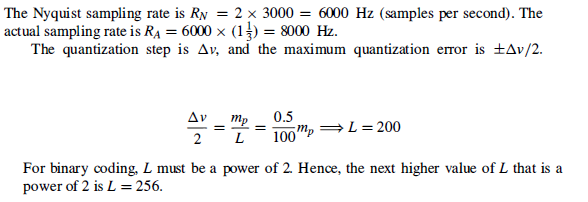
* we need n = log(2)256 = 8 bits per sample. We require to transmit
a total of C = 8 x 8000 = 64, 000 bit/s. Because we can transmit up to 2 bit/s per hertz of bandwidth, we require a minimum transmission bandwidth BT = C /2 = 32 kHz. The multiplexed signal has a total of CM = 24 x 64, 000 = 1 .536 Mbit/s, which requires a minimum of 1 .536/2 = 0.768 MHz of transmission bandwidth.

In [ ]:
from math import log
#band limited freq in hertz
fm=1100

Rn=2*fm       # # Nyquist sampling rate
Ra=Rn*(4/3)     ## actual Nyquist sampling rate
# Here the maximum quantization error(E) is 0.5% of the peak amplitide mp. Hence, E=mp/L=0.5*mp/100*L
mp=1            ##we assume peak amplitude is unity
L=(mp*100)/(0.5*mp)#

for i in range(0,11):
    j=2**i
    if(j>=L):
        L1=j#
        break#
    
n=log(L1,2)## bits per sample
c=n*Ra## total no of bits transmitted
# Beause we can transmit up to 2bits/per hertz of bandwidth, we require minimum transmission bandwidth Bt=c/2
Bt=c/2#
print ("minimum transmission bandwidth = %.2f Hertz"%Bt)

#no of signal to be multiplexed
s=25
Cm=s*c ##total no of bits of 's' signal

c1=Cm/2 ## minimum transmission bandwidth
print ("minimum transmission bandwidth = %.2f Hertz"%c1)


minimum transmission bandwidth = 11733.33 Hertz
minimum transmission bandwidth = 293333.33 Hertz


#### Problem 2: 
A signal m(t) of bandwidth B = 4 kHz is transmitted using a binary companded PCM with μ = 100. Compare the case of L = 64 with the case of L = 256 from the point of view of transmission bandwidth and the output SNR.

####Solution:
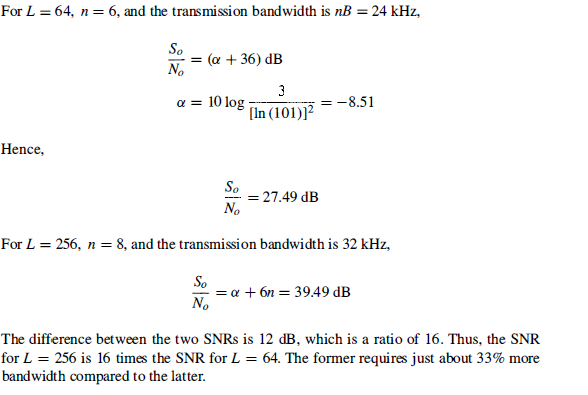


In [ ]:
from math import log,log10
# Using the expresion from [1] (So/No)=(a+6n) dB where a=10log[3/[ln(1+u)]**2]
#check the following code for L=64 and L=256
#the value of L
L=12
#the bandwidth of signal in hertz 
B=350
n=log(L,2)#
Bt=n*B#
u=100##given
a=10*log10(3/(log(1+u))**2)
SNR=(a+(6*n))#
print ("SNR ratio is = %0.2f "%SNR)
# Here the SNR ratio for the two cases are found out. 
#The difference between the two SNRs is 12dB which is the ratio of 16. 
#Thus the SNR for L=256 is 16 times the SNR for L=64. The former requires just about 33% more bandwidth compared to the later.

SNR ratio is = 13.00 


####Problem 3: 
Calculate the number of bits required, bandwidth required for 30 encodersand signalling rate for PCM signal for following specifications:
* maximum frequency = f_m = 4*10^3
* maximun amplitude of input signalx_max = 3.8
* average power of signal,  P = 30*10^-3 
* signal to noise ratio in db, S/N_dB= 20 

In [ ]:
import math
#given
f_m = 4.*10**3#maximum frequency or bans
x_max = 3.8#maximun input signal
P = 30.*10**-3#average power of signal
SbyN_dB= 20.#signal to noise ratio in db

#calculations
SbyN = math.exp((SbyN_dB/10)*math.log(10));
v = round((math.log10((SbyN*(x_max)**2)/(3*P))/math.log10(2.)/2.));#number of bits required per sample
BW = 30*v*f_m#transmission channel bandwidth which is greater than or equal to obtained value
r=BW*2#wkt signalling rate is two times the transmission bandwidth

#resulta
print ("i.Number of bits required (bits) = ",round(v,2))
print ("ii.Bandwidth required for 30 PCM coders (kHz) = ",round(BW/1000.,0))
print ("iii.Signalling rate (bitspersecond) = ",round(r/1000.,0))

i.Number of bits required (bits) =  7
ii.Bandwidth required for 30 PCM coders (kHz) =  840.0
iii.Signalling rate (bitspersecond) =  1680.0


##Post Lab Exercise
###Problem: 
Calculate the minumum sampling rate and minumum bit rate required for following data:
* maximum quantization error, e_max = .001
* maximum amplitude, x_max = 10
* minumum amplitude,  x_min = -10, 
* bandwidth of input signal, f_m = 100.